## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Encoder Decoder

Input Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Input Image

## Import Modules

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Input, InputLayer, Flatten, Reshape, BatchNormalization
from keras.datasets import cifar10, mnist
from keras.models import Sequential, Model

## Load the Dataset

In [15]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [16]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test= x_test.astype('float32') / 255

In [ ]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
# x_train /= 255
# np.reshape(x_train_orig, newshape=(x_train_orig.shape[0], np.prod(x_train_orig.shape[1:])))
# x_test /= 255
# np.reshape(x_test_orig, newshape=(x_test_orig.shape[0], np.prod(x_test_orig.shape[1:])))
x_test.shape

In [17]:
x_train = x_train.reshape(len(x_train),x_train.shape[1],x_train.shape[2],3)
x_test = x_test.reshape(len(x_test), x_test.shape[1],x_test.shape[2],3)
# x_train = x_train.reshape(len(x_train), 28, 28, 1)
# x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 32, 32, 3)

## Exploratory Data Analysis

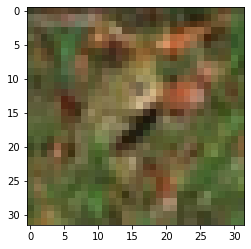

In [18]:
# randomly select input image
index = np.random.randint(len(x_train))
# plot the image
plt.imshow(x_train[index])
plt.gray()

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index])
plt.gray()

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

In [ ]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

In [ ]:
def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

In [ ]:

def build_autoencoder(input_img):
    #encoder
    encoder = Conv2D(16, kernel_size=3, activation='relu', padding='same')(input_img)
    encoder = MaxPooling2D(2, padding='same')(encoder)
    
    encoder = Conv2D(8, kernel_size=3, activation='relu', padding='same')(encoder)
    encoder = MaxPooling2D(2, padding='same')(encoder)
    encoder = Conv2D(8, kernel_size=3, activation='relu', padding='same')(encoder)
    encoded = MaxPooling2D(2, padding='same', name='encoder')(encoder)

    #decoder
    decoder = Conv2D(32, kernel_size=3,strides=1, activation='relu', padding='same')(encoded)
    # decoder= BatchNormalization()
    decoder = UpSampling2D(2)(decoder)
    decoder = Conv2D(8, kernel_size=3,strides=1, activation='relu', padding='same')(decoder)
    decoder = UpSampling2D(2)(decoder)
    # decoder= BatchNormalization()
    decoder = Conv2D(16, kernel_size=3, strides=1,activation='relu',padding='same')(decoder)
    decoder = UpSampling2D(2)(decoder)
    decoded = Conv2D(3, kernel_size=1,strides=1, activation='sigmoid', padding='same')(decoder)

#    model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32

# model.add(BatchNormalization())     # 16x16x32
# model.add(UpSampling2D())
# model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
# model.add(BatchNormalization())

#     model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
# model.add(BatchNormalization())     # 32x32x32
# model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
# model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32

# model.add(BatchNormalization())     # 16x16x32
# model.add(UpSampling2D())
# model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
# model.add(BatchNormalization())
# model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

# model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
# model.summary()

    return encoded, decoded

In [ ]:
IMG_SHAPE = x_test.shape[1:]
# inp = Input(IMG_SHAPE)
input_img = Input(shape=(28,28,1))
encoder, decoder = build_autoencoder(input_img)

# code = encoder(input_img)
# reconstruction = decoder(code)
# autoencoder = Model(inp,reconstruction)
# autoencoder.compile(optimizer='adamax', loss='mse')
autoencoder = Model(input_img,decoder)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
print(autoencoder.summary())
# print(autoencoder.summary())

In [ ]:
# train the model
history = autoencoder.fit(x=x_train, y=x_train, epochs=1, batch_size=256, validation_data=(x_test, x_test))

In [ ]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(pred[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [ ]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = autoencoder.predict(img[None])[0]
    reco = autoencoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = x_test[i]
    visualize(img,encoder,decoder)

In [ ]:
# for i in range(25):
#     print("Epoch %i/25, Generating corrupted samples..."%(i+1))
#     X_train_noise = apply_gaussian_noise(x_train)
#     X_test_noise = apply_gaussian_noise(x_test)
#     img = X_test_noise[i]
#     visualize(img,encoder,decoder)
    # We continue to train our model with new noise-augmented data
autoencoder.fit(x=x_train, y=x_train, epochs=1,
                    validation_data=[x_train, x_test])

In [ ]:
# train the model
history = autoencoder.fit(x=x_train, y=x_train, epochs=1, batch_size=256, validation_data=(x_test, x_test))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Visualize the Results

In [ ]:
# predict the results from model (get compressed images)
pred = autoencoder.predict(x_test)

In [19]:
# model = Sequential([
#                     # encoder network
#                     Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
#                     MaxPooling2D(2, padding='same'),
#                     Conv2D(16, 3, activation='relu', padding='same'),
#                     MaxPooling2D(2, padding='same'),
#                     # decoder network
#                     Conv2D(16, 3, activation='relu', padding='same'),
#                     UpSampling2D(2),
#                     Conv2D(32, 3, activation='relu', padding='same'),
#                     UpSampling2D(2),
#                     # output layer
#                     Conv2D(1, 3, activation='sigmoid', padding='same')
# ])
model = Sequential()
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32

model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

# model.compile(optimizer='adam', loss='binary_crossentropy')
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 up_sampling2d_5 (UpSampling  (None, 32, 32, 32)      

In [20]:
# train the model
historyModel = model.fit(x=x_train, y=x_train, epochs=1, batch_size=256, validation_data=(x_test, x_test))

196/196 [==============================] - 111s 564ms/step - loss: 0.0077 - accuracy: 0.6695 - val_loss: 0.0260 - val_accuracy: 0.6287


In [21]:
predicted = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


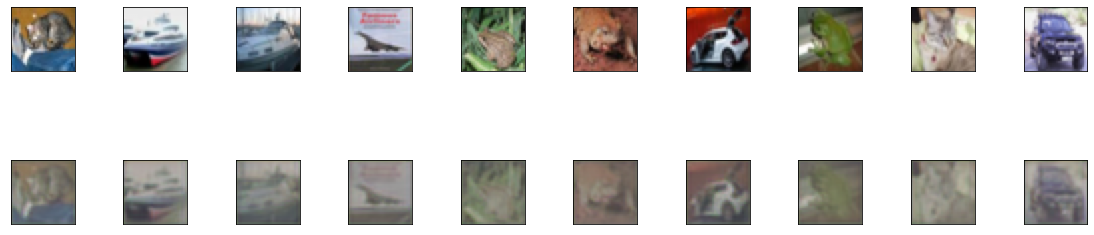

In [23]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index])
plt.gray()

In [ ]:
# visualize compressed image
plt.imshow(pred[index])
plt.gray()

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index])
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index])
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Performance Metrics

Performance Metrics helps to measure the compression performances. Below are some metrics used to measure the performance of the model.   

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io

In [ ]:
def calculate_mse(imageA, imageB):
	return mse(imageA, imageB)

def calculate_psnr(imageA, imageB):
	return psnr(imageA, imageB)

def calculate_ssim(imageA, imageB):
	return ssim(imageA, imageB)

def compression_ratio(original, compressed):
	return (original.size) / (compressed.size)

def compare_images(original, compressed, title):
	# compute the mean squared error, peak signal noise ratio and structural similarity

	fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
	ax = axes.ravel()

	# setup the figure
	ax[0].imshow(original, cmap=plt.cm.gray)
	ax[0].set_xlabel(f'MSE: {calculate_mse(original,original):.3f}, SSIM: {calculate_ssim(original,original):.3f}')
	ax[0].set_title('Original image')

	ax[1].imshow(compressed, cmap=plt.cm.gray)
	ax[1].set_xlabel(f'MSE: {calculate_mse(original,compressed):.3f}, PSNR: {calculate_psnr(original,compressed):.3f}, SSIM: {calculate_ssim(original,compressed):.3f}')
	ax[1].set_title('Compressed image')

	plt.show()

In [ ]:
# initialize the figure
fig = plt.figure("Images")
index  = np.random.randint(len(x_test))
original = np.squeeze(x_test[index].reshape(28,28))
compressed = np.squeeze(pred[index].reshape(28,28))
images = ("Original", original), ("Compressed", compressed)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()

#compare image quality
compare_images(original, compressed, "Original vs. Compressed")

#calculate compression ratio
cr = "{:.4f}".format(compression_ratio(original, compressed))
print(cr)